In [27]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import roc_auc_score
from sklearn.metrics import RocCurveDisplay
from sklearn import metrics

In [28]:
# reading the source file 
df = pd.read_csv("smoking.csv")
df.head()

,ID,gender,age,height(cm),weight(kg),waist(cm),eyesight(left),eyesight(right),hearing(left),hearing(right),...,hemoglobin,Urine protein,serum creatinine,AST,ALT,Gtp,oral,dental caries,tartar,smoking
0,0,F,40,155,60,81.3,1.2,1.0,1.0,1.0,...,12.9,1.0,0.7,18.0,19.0,27.0,Y,0,Y,0
1,1,F,40,160,60,81.0,0.8,0.6,1.0,1.0,...,12.7,1.0,0.6,22.0,19.0,18.0,Y,0,Y,0
2,2,M,55,170,60,80.0,0.8,0.8,1.0,1.0,...,15.8,1.0,1.0,21.0,16.0,22.0,Y,0,N,1
3,3,M,40,165,70,88.0,1.5,1.5,1.0,1.0,...,14.7,1.0,1.0,19.0,26.0,18.0,Y,0,Y,0
4,4,F,40,155,60,86.0,1.0,1.0,1.0,1.0,...,12.5,1.0,0.6,16.0,14.0,22.0,Y,0,N,0


# Data Dictionary 

- ID : index
- gender
- age : 5-years gap
- height(cm)
- weight(kg)
- waist(cm) : Waist circumference length
- eyesight(left)
- eyesight(right)
- hearing(left)
- hearing(right)
- systolic : Blood pressure
- relaxation : Blood pressure
- fasting blood sugar
- Cholesterol : total
- triglyceride
- HDL : cholesterol type
- LDL : cholesterol type
- hemoglobin
- Urine protein
- serum creatinine
- AST : glutamic oxaloacetic transaminase type
- ALT : glutamic oxaloacetic transaminase type
- Gtp : γ-GTP
- oral : Oral Examination status
- dental caries
- tartar : tartar status
- smoking : Target variable 

In [29]:
# size of the dataset
df.shape

(55692, 27)

In [30]:
# checking the types of the variables 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 55692 entries, 0 to 55691
Data columns (total 27 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   55692 non-null  int64  
 1   gender               55692 non-null  object 
 2   age                  55692 non-null  int64  
 3   height(cm)           55692 non-null  int64  
 4   weight(kg)           55692 non-null  int64  
 5   waist(cm)            55692 non-null  float64
 6   eyesight(left)       55692 non-null  float64
 7   eyesight(right)      55692 non-null  float64
 8   hearing(left)        55692 non-null  float64
 9   hearing(right)       55692 non-null  float64
 10  systolic             55692 non-null  float64
 11  relaxation           55692 non-null  float64
 12  fasting blood sugar  55692 non-null  float64
 13  Cholesterol          55692 non-null  float64
 14  triglyceride         55692 non-null  float64
 15  HDL                  55692 non-null 

In [31]:
# a quick overlook on how the data 
df.describe()

,ID,age,height(cm),weight(kg),waist(cm),eyesight(left),eyesight(right),hearing(left),hearing(right),systolic,...,HDL,LDL,hemoglobin,Urine protein,serum creatinine,AST,ALT,Gtp,dental caries,smoking
count,55692.000000,55692.000000,55692.000000,55692.000000,55692.000000,55692.000000,55692.000000,55692.000000,55692.000000,55692.000000,...,55692.000000,55692.000000,55692.000000,55692.000000,55692.000000,55692.000000,55692.000000,55692.000000,55692.000000,55692.000000
mean,27845.500000,44.182917,164.649321,65.864936,82.046418,1.012623,1.007443,1.025587,1.026144,121.494218,...,57.290347,114.964501,14.622592,1.087212,0.885738,26.182935,27.036037,39.952201,0.213334,0.367288
std,16077.039933,12.071418,9.194597,12.820306,9.274223,0.486873,0.485964,0.157902,0.159564,13.675989,...,14.738963,40.926476,1.564498,0.404882,0.221524,19.355460,30.947853,50.290539,0.409665,0.482070
min,0.000000,20.000000,130.000000,30.000000,51.000000,0.100000,0.100000,1.000000,1.000000,71.000000,...,4.000000,1.000000,4.900000,1.000000,0.100000,6.000000,1.000000,1.000000,0.000000,0.000000
25%,13922.750000,40.000000,160.000000,55.000000,76.000000,0.800000,0.800000,1.000000,1.000000,112.000000,...,47.000000,92.000000,13.600000,1.000000,0.800000,19.000000,15.000000,17.000000,0.000000,0.000000
50%,27845.500000,40.000000,165.000000,65.000000,82.000000,1.000000,1.000000,1.000000,1.000000,120.000000,...,55.000000,113.000000,14.800000,1.000000,0.900000,23.000000,21.000000,25.000000,0.000000,0.000000
75%,41768.250000,55.000000,170.000000,75.000000,88.000000,1.200000,1.200000,1.000000,1.000000,130.000000,...,66.000000,136.000000,15.800000,1.000000,1.000000,28.000000,31.000000,43.000000,0.000000,1.000000
max,55691.000000,85.000000,190.000000,135.000000,129.000000,9.900000,9.900000,2.000000,2.000000,240.000000,...,618.000000,1860.000000,21.100000,6.000000,11.600000,1311.000000,2914.000000,999.000000,1.000000,1.000000


In [32]:
# checking for NULL's
df.isnull().sum()

ID                     0
gender                 0
age                    0
height(cm)             0
weight(kg)             0
waist(cm)              0
eyesight(left)         0
eyesight(right)        0
hearing(left)          0
hearing(right)         0
systolic               0
relaxation             0
fasting blood sugar    0
Cholesterol            0
triglyceride           0
HDL                    0
LDL                    0
hemoglobin             0
Urine protein          0
serum creatinine       0
AST                    0
ALT                    0
Gtp                    0
oral                   0
dental caries          0
tartar                 0
smoking                0
dtype: int64

C:\Users\Renga\AppData\Local\Temp\ipykernel_42100\1479925605.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr().round(3), annot= True).figure.set_size_inches(20, 10)


Text(0.5, 1.0, 'Correlation plot for the dataset')

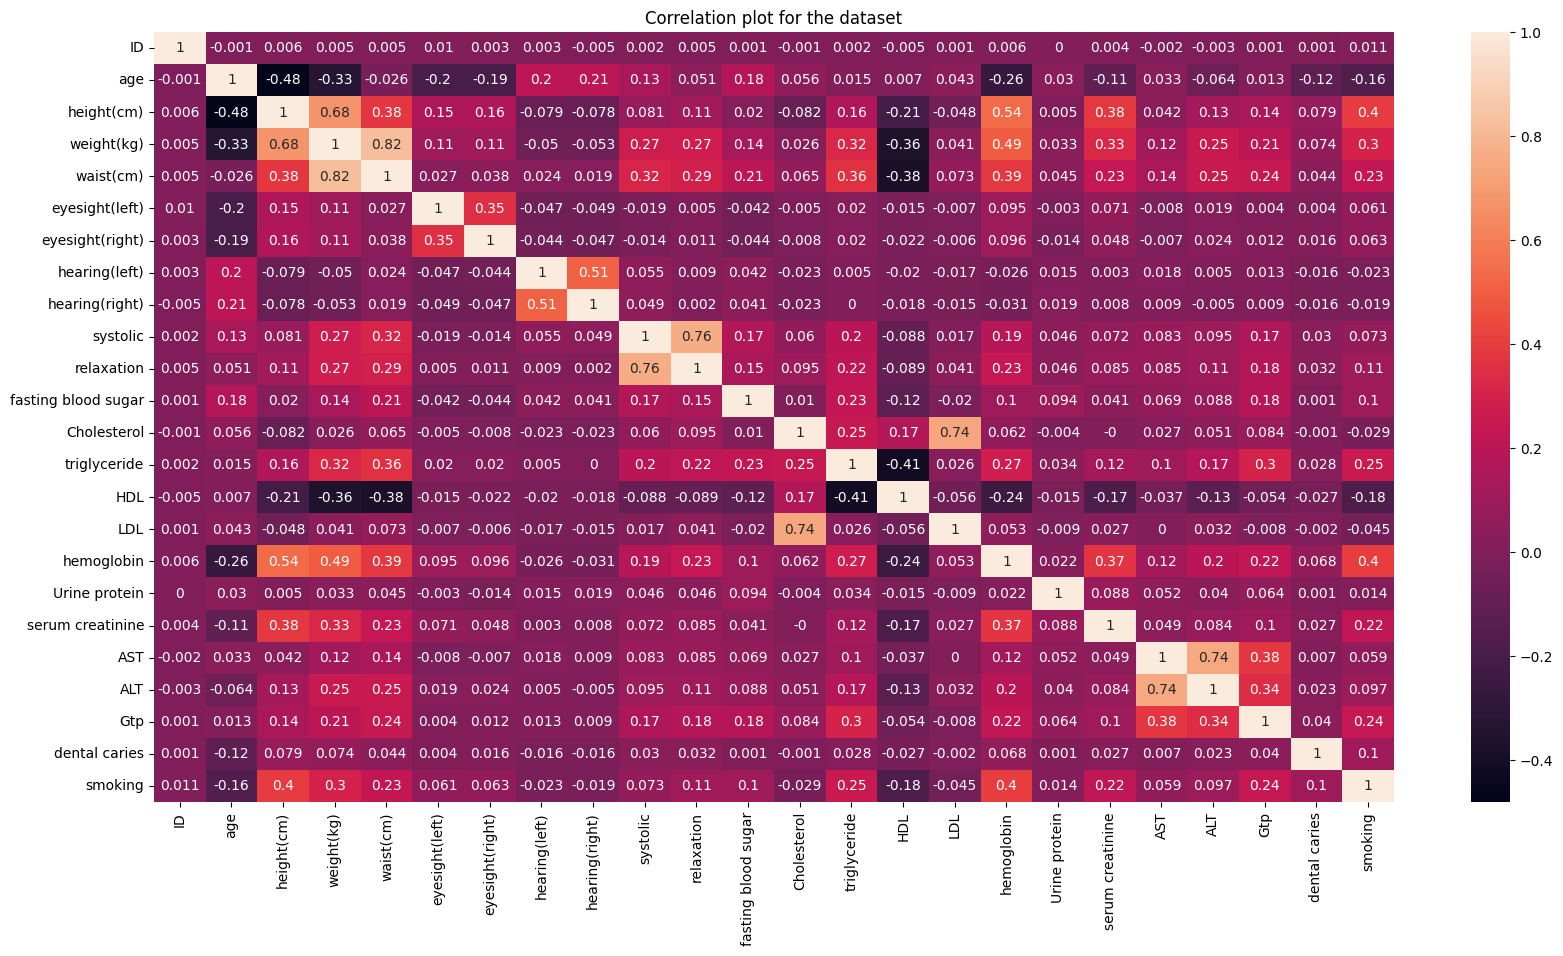

In [33]:
# plotting the correlation to see which variables are strongly correlated 
sns.heatmap(df.corr().round(3), annot= True).figure.set_size_inches(20, 10)
plt.title(label="Correlation plot for the dataset")

# Initial Data Analysis 

[Text(0.5, 1.0, 'Distribution of the target variable')]

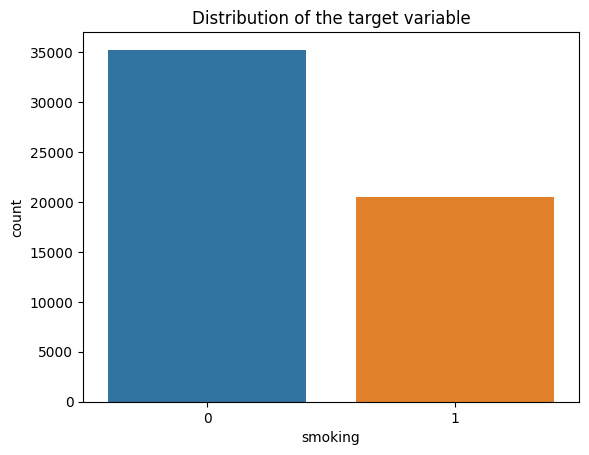

In [34]:
# checking for data imbalance 
sns.countplot(df, x="smoking").set(title="Distribution of the target variable")

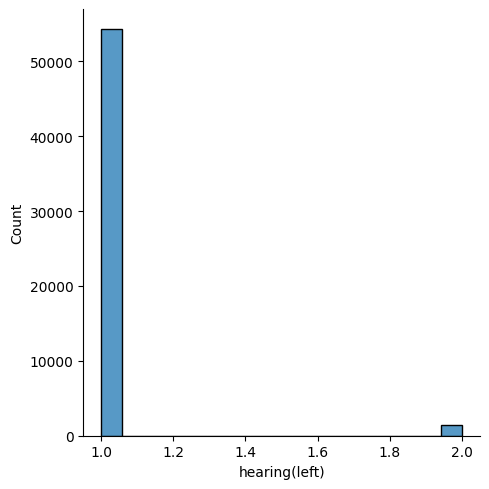

In [35]:
sns.displot(df["hearing(left)"])

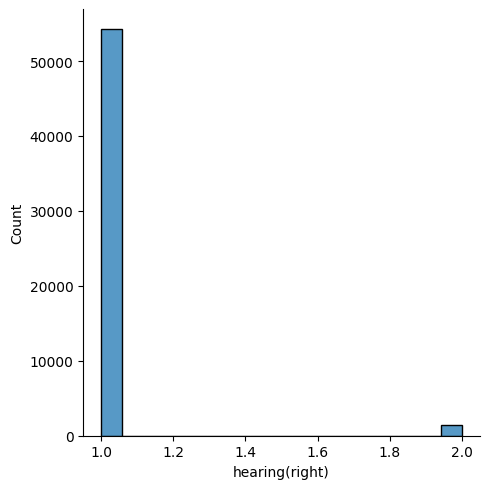

In [36]:
sns.displot(df["hearing(right)"])

In [37]:
df["hearing(left)"].unique()

array([1., 2.])

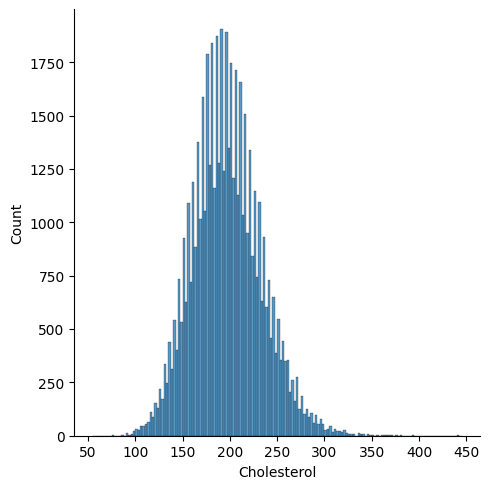

In [38]:
# hearing, systolic, relaxation, fasting blood sugar level, cholesterol, triglyceride , smoking

sns.displot(df["Cholesterol"])

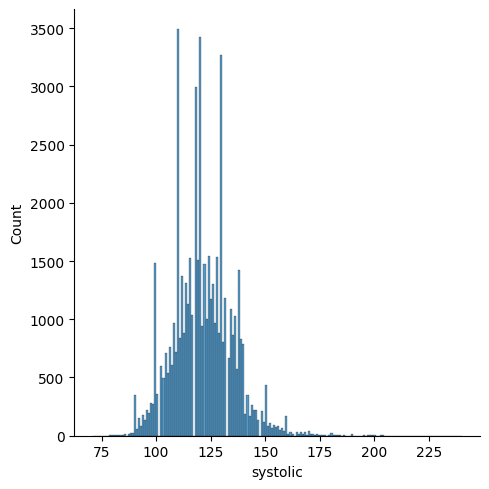

In [39]:
# hearing, systolic, relaxation, fasting blood sugar level, cholesterol, triglyceride , smoking

sns.displot(df["systolic"])

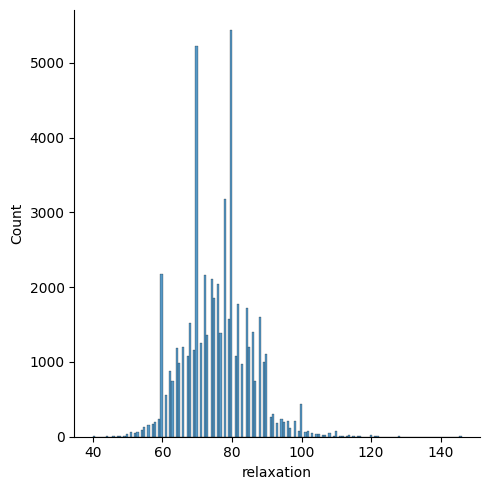

In [40]:
# hearing, systolic, relaxation, fasting blood sugar level, cholesterol, triglyceride , smoking

sns.displot(df["relaxation"])

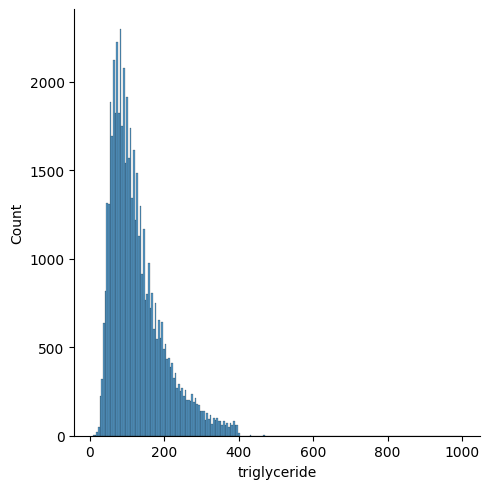

In [41]:
# hearing, systolic, relaxation, fasting blood sugar level, cholesterol, triglyceride , smoking

sns.displot(df["triglyceride"])

<AxesSubplot: xlabel='fasting blood sugar', ylabel='triglyceride'>

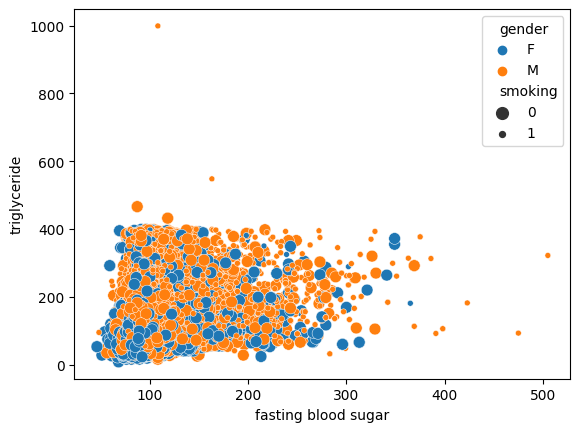

In [42]:
sns.scatterplot(data = df, y = "triglyceride", x= "fasting blood sugar",hue = "gender",size= "smoking")

<AxesSubplot: xlabel='fasting blood sugar', ylabel='Cholesterol'>

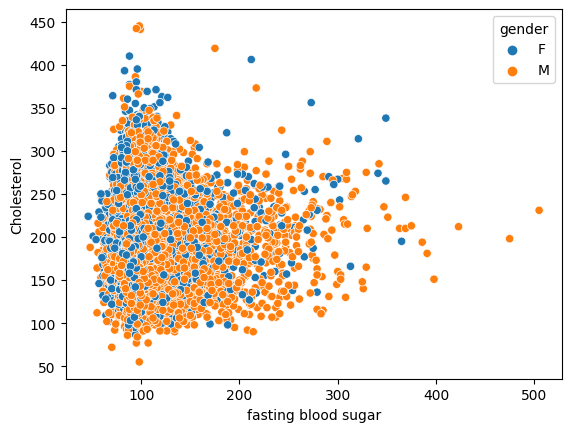

In [43]:
sns.scatterplot(data = df, y = "Cholesterol", x= "fasting blood sugar",hue = "gender")

<AxesSubplot: xlabel='gender', ylabel='Cholesterol'>

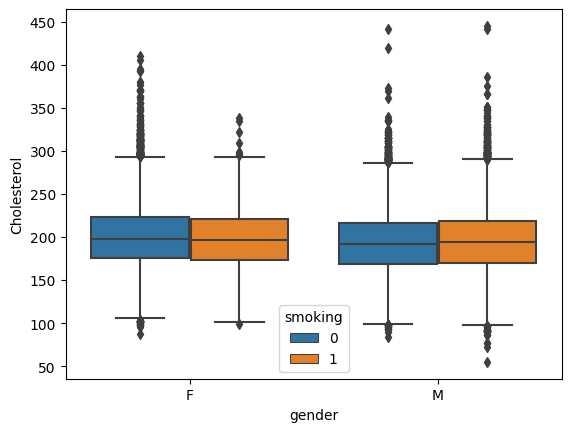

In [44]:
sns.boxplot(data = df, x ="gender" , y= "Cholesterol", hue="smoking")

<AxesSubplot: xlabel='smoking', ylabel='fasting blood sugar'>

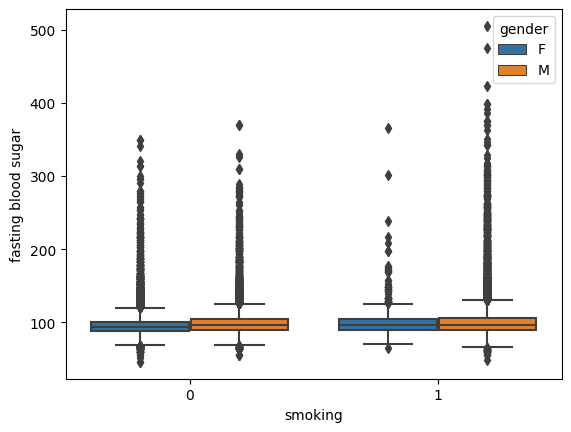

In [45]:
sns.boxplot(data = df, x ="smoking" , y= "fasting blood sugar",hue="gender")

<AxesSubplot: xlabel='smoking', ylabel='systolic'>

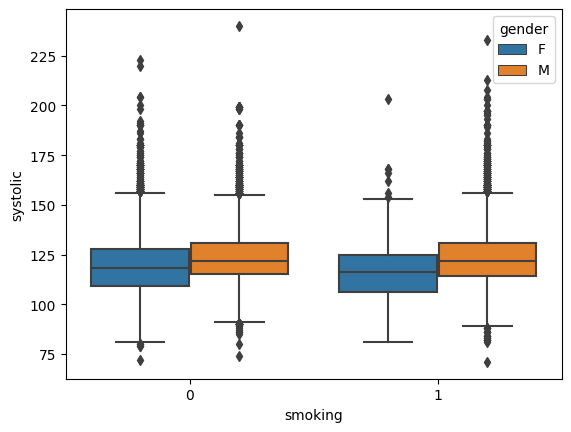

In [46]:
sns.boxplot(data = df, x ="smoking" , y= "systolic",hue="gender")

<AxesSubplot: xlabel='smoking', ylabel='ALT'>

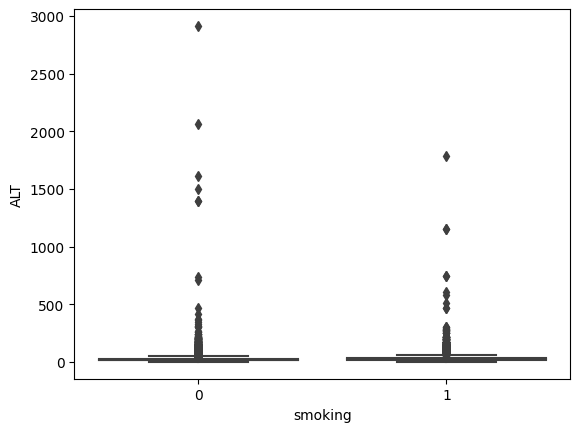

In [47]:
sns.boxplot(data = df, x ="smoking" , y= "ALT")

[Text(0.5, 1.0, 'Relationship between smoking and relaxation')]

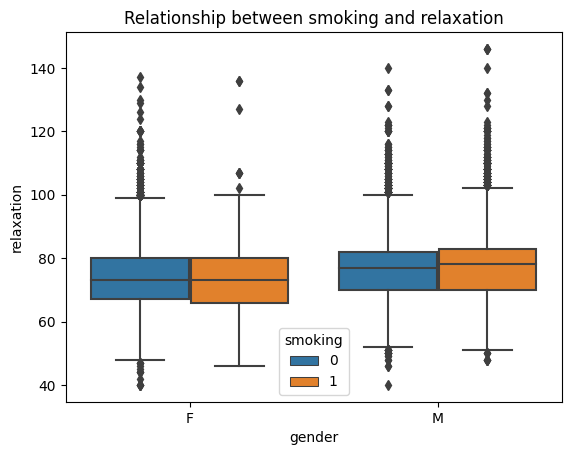

In [48]:
# hearing, systolic, relaxation, fasting blood sugar level, cholesterol, triglyceride , smoking
sns.boxplot(data = df, x ="gender" , y= "relaxation",hue="smoking").set(title = "Relationship between smoking and relaxation")

<AxesSubplot: xlabel='smoking', ylabel='triglyceride'>

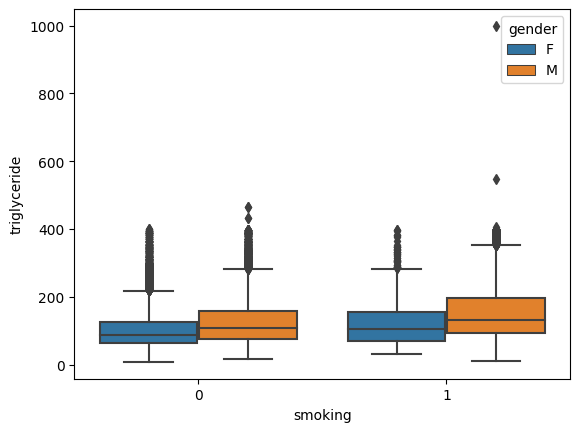

In [49]:
sns.boxplot(data = df, x ="smoking" , y= "triglyceride",hue="gender")

<AxesSubplot: xlabel='hearing(left)', ylabel='Cholesterol'>

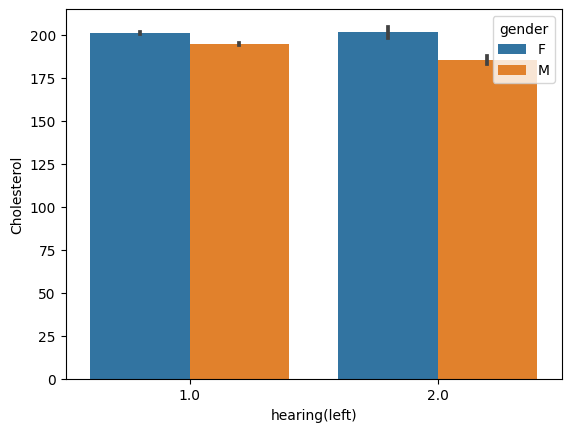

In [50]:
sns.barplot(data = df, y = "Cholesterol", x= "hearing(left)",hue = "gender")

<AxesSubplot: xlabel='smoking', ylabel='hearing(right)'>

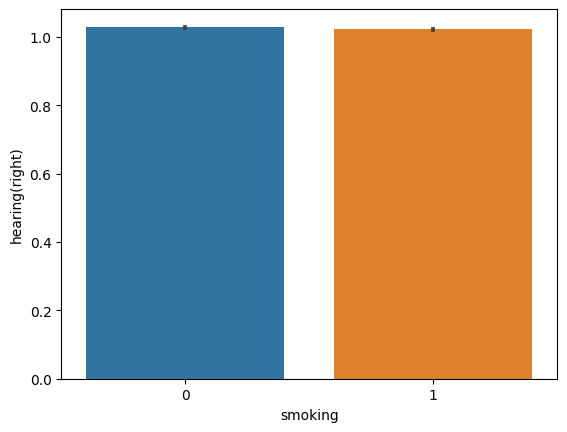

In [51]:
sns.barplot(data = df, y = "hearing(right)", x= "smoking")

<AxesSubplot: xlabel='age', ylabel='height(cm)'>

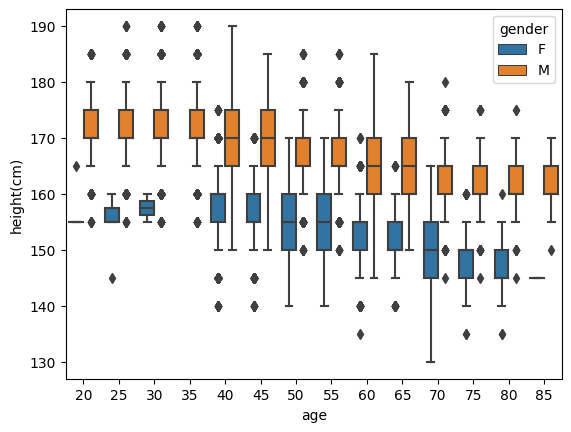

In [52]:
sns.boxplot(data = df, x = "age",y ="height(cm)",hue="gender")

In [53]:
# LDL < 100 healthy heart
# HDL > 60 healthy heart
# data_male= df[df["gender"=="M"]]
# data_female= df[df["gender"=="F"]]
data_male = df[df["gender"]=="M"]
data_female = df[df["gender"]=="F"]
data_female

,ID,gender,age,height(cm),weight(kg),waist(cm),eyesight(left),eyesight(right),hearing(left),hearing(right),...,hemoglobin,Urine protein,serum creatinine,AST,ALT,Gtp,oral,dental caries,tartar,smoking
0,0,F,40,155,60,81.3,1.2,1.0,1.0,1.0,...,12.9,1.0,0.7,18.0,19.0,27.0,Y,0,Y,0
1,1,F,40,160,60,81.0,0.8,0.6,1.0,1.0,...,12.7,1.0,0.6,22.0,19.0,18.0,Y,0,Y,0
4,4,F,40,155,60,86.0,1.0,1.0,1.0,1.0,...,12.5,1.0,0.6,16.0,14.0,22.0,Y,0,N,0
8,9,F,50,150,60,85.0,0.7,0.8,1.0,1.0,...,13.7,1.0,0.8,31.0,31.0,14.0,Y,0,N,0
13,14,F,40,155,45,59.0,1.5,1.2,1.0,1.0,...,12.6,1.0,0.7,13.0,9.0,9.0,Y,0,N,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
55681,55652,F,45,160,65,75.0,1.2,1.2,1.0,1.0,...,12.6,1.0,0.8,27.0,21.0,13.0,Y,0,Y,0
55686,55673,F,60,150,50,75.0,1.0,1.2,1.0,1.0,...,12.6,1.0,0.8,26.0,21.0,14.0,Y,0,Y,0
55687,55676,F,40,170,65,75.0,0.9,0.9,1.0,1.0,...,12.3,1.0,0.6,14.0,7.0,10.0,Y,1,Y,0
55688,55681,F,45,160,50,70.0,1.2,1.2,1.0,1.0,...,14.0,1.0,0.9,20.0,12.0,14.0,Y,0,Y,0


<AxesSubplot: xlabel='HDL', ylabel='triglyceride'>

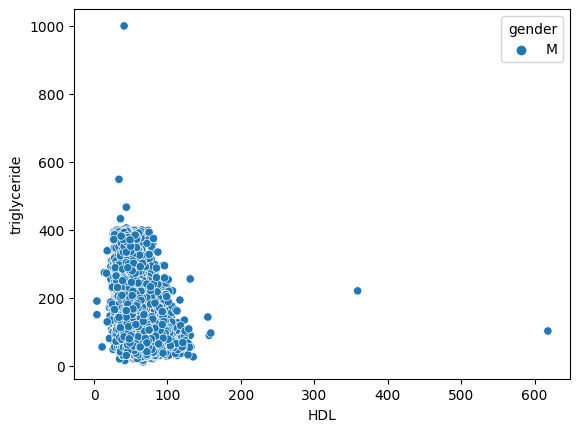

In [54]:
sns.scatterplot(data = data_male, x = "HDL",y ="triglyceride",hue="gender")

# Your healthcare provider classifies high triglyceride levels as:

# Mild: 150-199 mg/dL.
# Moderate: 200-499 mg/dL.
# Severe: Greater than 500 mg/dL.
# What are risk factors for high triglycerides?
# Factors that may raise triglyceride levels include:

# Excessive alcohol use.
# Family history of high cholesterol.
# Liver disease or kidney disease.
# Medications, including diuretics, hormones, corticosteroids and beta blockers.
# Menopause.
# Obesity.
# Smoking.
# Thyroid disease.
# Unregulated diabetes.
# A diet high in sugar and simple carbohydrates.

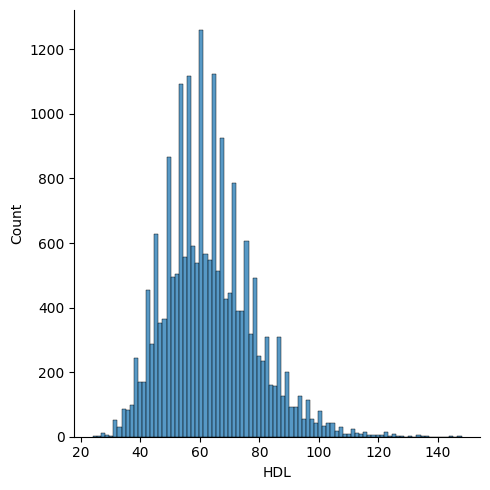

In [55]:
sns.displot(data_female["HDL"]) 
# https://my.clevelandclinic.org/health/articles/11920-cholesterol-numbers-what-do-they-mean
# https://my.clevelandclinic.org/health/articles/11117-triglycerides

<AxesSubplot: xlabel='HDL', ylabel='triglyceride'>

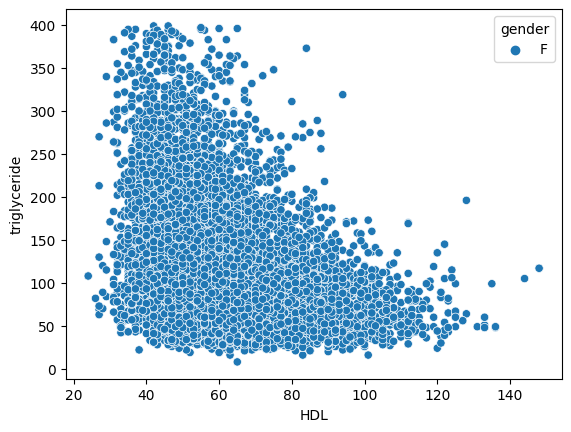

In [56]:
sns.scatterplot(data = data_female, x = "HDL",y ="triglyceride",hue="gender")

[Text(0.5, 1.0, 'Relationship between age and smoking')]

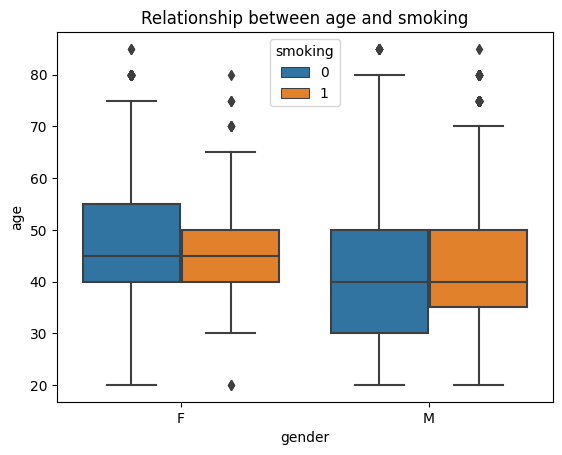

In [57]:
# summary=df.groupby(["gender","smoking"])["age","weight(kg)","height(cm)"]
# summary.plot(kind="box",figsize=(15,7)) 

# males tend to smoke in their early stage of life i.e around 20 years whereas women generally tend to start smoking most likely at the age of 30
sns.boxplot(data= df , x ="gender",y="age",hue= "smoking").set(title = "Relationship between age and smoking")

[Text(0.5, 1.0, 'Relationship between triglyceride and smoking based on gender')]

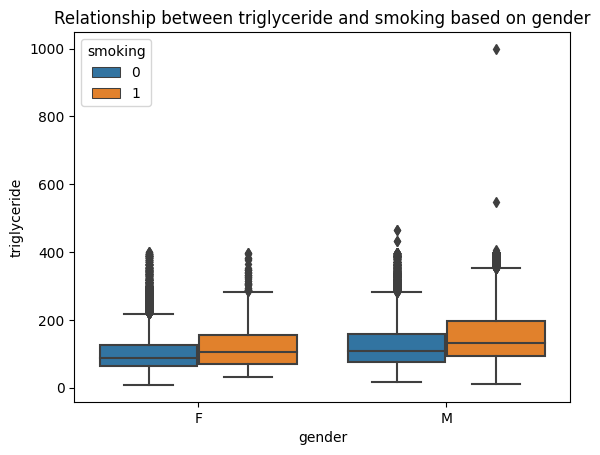

In [58]:
sns.boxplot(data= df , x ="gender",y="triglyceride",hue= "smoking").set(title = "Relationship between triglyceride and smoking based on gender")

[Text(0.5, 1.0, 'Relationship between weight and smoking')]

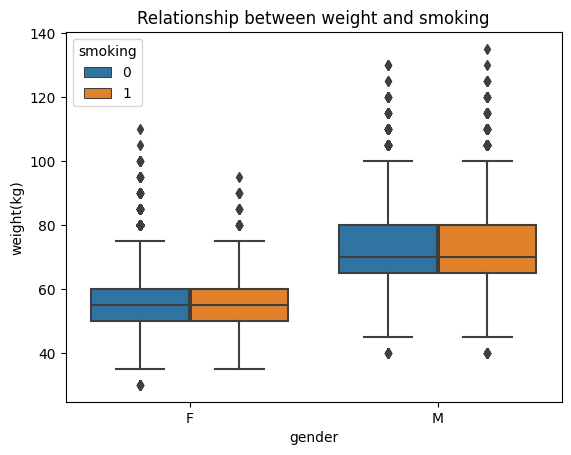

In [59]:
sns.boxplot(data= df , x ="gender",y="weight(kg)",hue= "smoking").set(title = "Relationship between weight and smoking")
# we can say that weight is not a major concern if a person smokes
# generally we have a misconception that people who smoke tend to weigh less, but the obvservation does not prove our assumption.

<AxesSubplot: xlabel='gender', ylabel='height(cm)'>

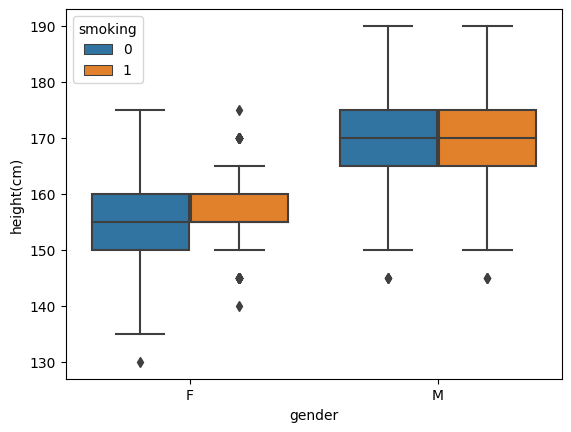

In [60]:
sns.boxplot(data= df , x ="gender",y="height(cm)",hue= "smoking")


In [61]:
df['smoking'].value_counts(normalize = True)

0    0.632712
1    0.367288
Name: smoking, dtype: float64

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


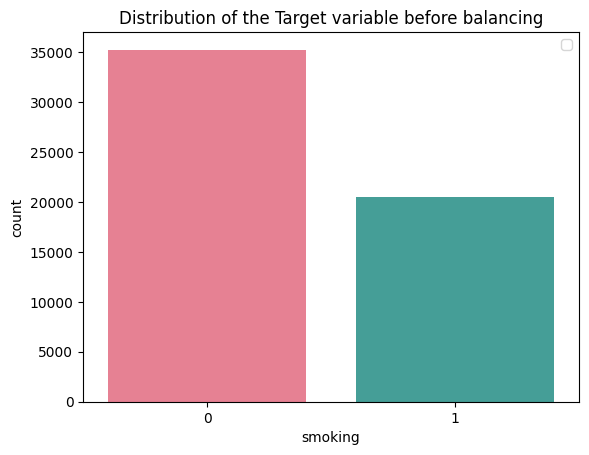

In [62]:
sns.countplot(data=df,x='smoking', palette = "husl").set(title = "Distribution of the Target variable before balancing")
plt.legend()
plt.show()

In [63]:
from imblearn.over_sampling import SMOTENC 
from sklearn.model_selection import train_test_split
from collections import Counter

In [64]:
X = df.iloc[:,0:26]
X
y= df["smoking"]
y = pd.DataFrame(y,columns = ["smoking"])
y

,smoking
0,0
1,0
2,1
3,0
4,0
...,...
55687,0
55688,0
55689,0
55690,0


In [65]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
y_train.value_counts()

smoking
0          24680
1          14304
dtype: int64

# Start of the balancing techniques

In [66]:
# train = pd.concat([X_train,y_train],axis=1)
# test = pd.concat([X_test,y_test],axis=1)
# test
X.dtypes

ID                       int64
gender                  object
age                      int64
height(cm)               int64
weight(kg)               int64
waist(cm)              float64
eyesight(left)         float64
eyesight(right)        float64
hearing(left)          float64
hearing(right)         float64
systolic               float64
relaxation             float64
fasting blood sugar    float64
Cholesterol            float64
triglyceride           float64
HDL                    float64
LDL                    float64
hemoglobin             float64
Urine protein          float64
serum creatinine       float64
AST                    float64
ALT                    float64
Gtp                    float64
oral                    object
dental caries            int64
tartar                  object
dtype: object

In [67]:
# balancing the data out
sm = SMOTENC(random_state=42,categorical_features=[1,23,25])
X_res, y_res = sm.fit_resample(X_train, y_train)


In [68]:
# percentage of values after balancing
y_res.value_counts(normalize = True)

smoking
0          0.5
1          0.5
dtype: float64

In [69]:
X_res.shape

(49360, 26)

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


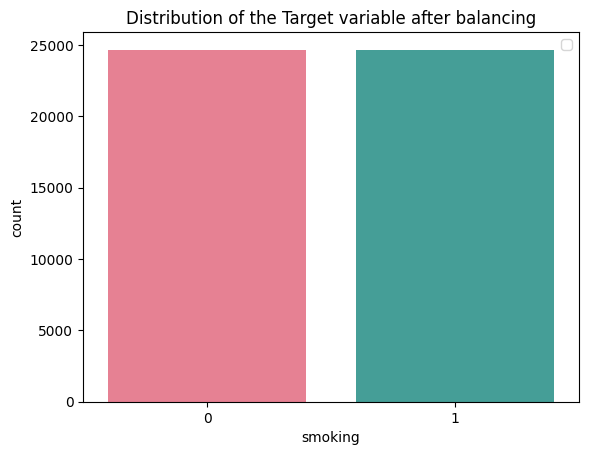

In [70]:
sns.countplot(data=y_res,x='smoking', palette = "husl").set(title = "Distribution of the Target variable after balancing")
plt.legend()
plt.show()

# Modelling 

Logistic Regression 

In [71]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report
from sklearn.metrics import accuracy_score


In [72]:
# getting dummies for train 
X_res = pd.get_dummies(X_res)
X_res
X_res = X_res.iloc[:,1:26]


In [73]:
# getting dummies for test
X_test = pd.get_dummies(X_test)
X_test = X_test.iloc[:,1:26]

In [74]:
X_train = X_res
y_train = y_res

In [75]:
print(X_train.shape)
print(y_train.shape)

(49360, 25)
(49360, 1)


In [76]:
classifier = LogisticRegression()
model = classifier.fit(X_train,y_train)
y_pred = model.predict(X_test)
confusion = confusion_matrix(y_test, y_pred)

c:\Users\Renga\anaconda3\envs\DataMining\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\Renga\anaconda3\envs\DataMining\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


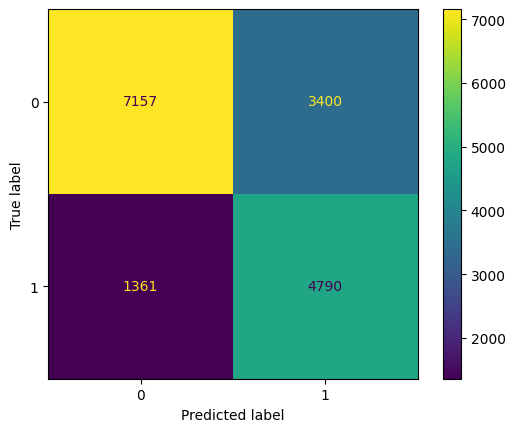

In [77]:
# printing the confusion matrix

disp = ConfusionMatrixDisplay(confusion)
disp.plot()

In [78]:
# confusion matrix 
TN = confusion[0,0]
TP = confusion[1,1]
FN = confusion[1,0]
FP = confusion[0,1]
# Evaluation Matrix 
Accuracy = (TP+TN)/(TP+TN+FP+FN)
Precision = TP/(TP+FP)
Recall = TP/(TP +FN)
print("The accuracy of the model is", Accuracy)
print("The Precision of the model is", Precision)
print("The Recall of the model is", Recall)

The accuracy of the model is 0.7150466842231267
The Precision of the model is 0.5848595848595849
The Recall of the model is 0.7787351650138189


In [79]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.84      0.68      0.75     10557
           1       0.58      0.78      0.67      6151

    accuracy                           0.72     16708
   macro avg       0.71      0.73      0.71     16708
weighted avg       0.75      0.72      0.72     16708



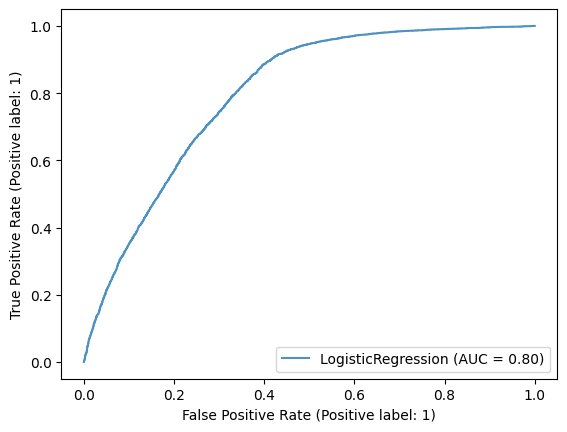

In [80]:
disp = RocCurveDisplay.from_estimator(model, X_test, y_test, alpha=0.8)

plt.show()

Decision Tree

In [81]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

In [82]:
feature_names = X_train.columns
feature_names

Index(['age', 'height(cm)', 'weight(kg)', 'waist(cm)', 'eyesight(left)',
       'eyesight(right)', 'hearing(left)', 'hearing(right)', 'systolic',
       'relaxation', 'fasting blood sugar', 'Cholesterol', 'triglyceride',
       'HDL', 'LDL', 'hemoglobin', 'Urine protein', 'serum creatinine', 'AST',
       'ALT', 'Gtp', 'dental caries', 'gender_F', 'gender_M', 'oral_Y'],
      dtype='object')

In [83]:
clf1 = DecisionTreeClassifier( random_state = 42)
model2  = clf1.fit(X_train, y_train)
# a = tree.plot_tree(clf,
#                    #use the feature names stored
#                    feature_names = feature_names,
#                    rounded = True,
#                    filled = True,
#                    fontsize=14)
# plt.show()

In [84]:
# prediction 
y_Pred = model2.predict(X_test)

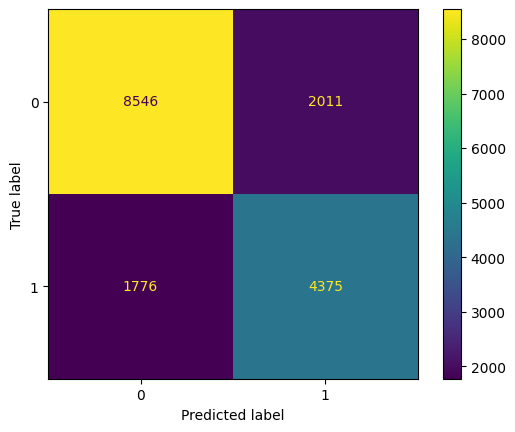

In [85]:
# printing the confusion matrix
confusion = confusion_matrix(y_test, y_Pred)
disp = ConfusionMatrixDisplay(confusion)
disp.plot()

In [86]:
print(classification_report(y_test, y_Pred))

              precision    recall  f1-score   support

           0       0.83      0.81      0.82     10557
           1       0.69      0.71      0.70      6151

    accuracy                           0.77     16708
   macro avg       0.76      0.76      0.76     16708
weighted avg       0.78      0.77      0.77     16708



In [87]:
accuracy_score(y_test, y_Pred)

0.773342111563323

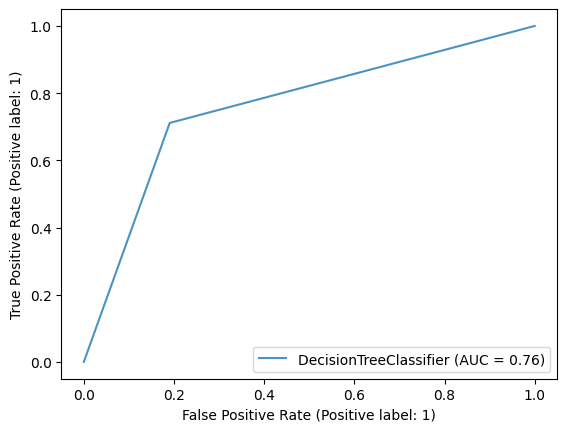

In [88]:
disp = RocCurveDisplay.from_estimator(model2, X_test, y_test, alpha=0.8)

plt.show()

Random Forest Classifier 

In [89]:
from sklearn.ensemble import RandomForestClassifier

In [90]:
clf2=RandomForestClassifier(random_state= 42,min_samples_split=2,n_estimators = 500)
model3 =clf2.fit(X_train, y_train)

C:\Users\Renga\AppData\Local\Temp\ipykernel_42100\2608178469.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model3 =clf2.fit(X_train, y_train)


In [91]:
# prediction 
y_Predict = model3.predict(X_test)

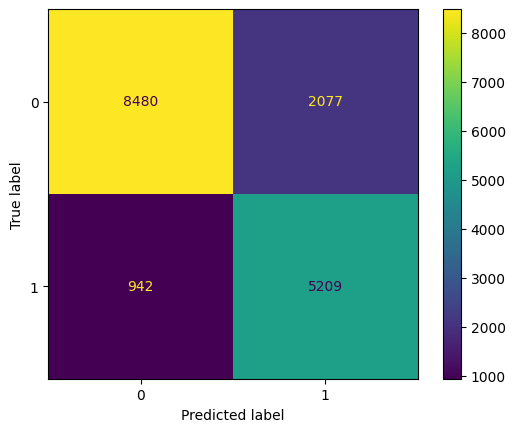

In [92]:
# printing the confusion matrix
confusion = confusion_matrix(y_test, y_Predict)
disp = ConfusionMatrixDisplay(confusion)
disp.plot()

In [93]:
print (model3.score(X_test,y_test))

0.8193081158726359


In [94]:
print(classification_report(y_test, y_Predict))

              precision    recall  f1-score   support

           0       0.90      0.80      0.85     10557
           1       0.71      0.85      0.78      6151

    accuracy                           0.82     16708
   macro avg       0.81      0.83      0.81     16708
weighted avg       0.83      0.82      0.82     16708



In [95]:
feature_importances = pd.DataFrame(model3.feature_importances_, index =X_train.columns,  columns=['importance']).sort_values('importance', ascending=False)

In [96]:
feature_importances

,importance
gender_F,0.113563
gender_M,0.109303
Gtp,0.073042
hemoglobin,0.070096
height(cm),0.060288
triglyceride,0.051524
serum creatinine,0.044171
age,0.041451
waist(cm),0.039580
ALT,0.039096


[Text(0.5, 1.0, 'Feature Importance Plot')]

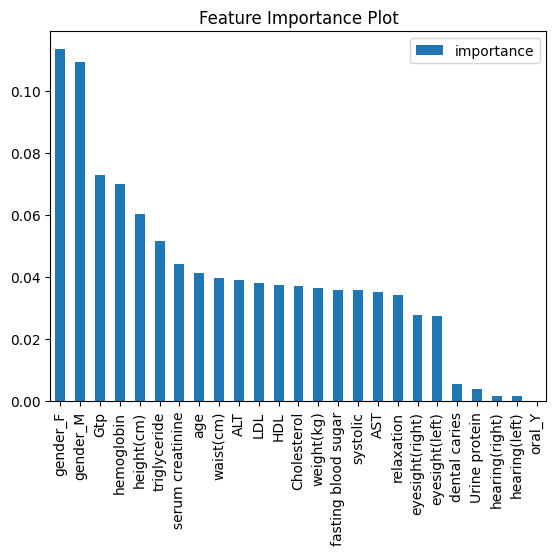

In [97]:
feature_importances.plot(kind="bar").set(title="Feature Importance Plot")

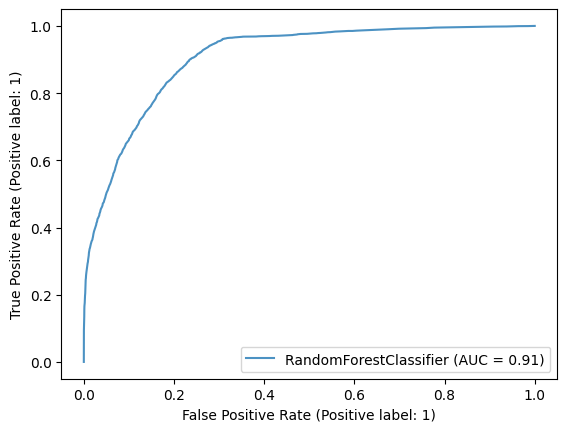

In [98]:
disp = RocCurveDisplay.from_estimator(model3, X_test, y_test, alpha=0.8)

plt.show()

Random forest with feature selection

In [99]:
X_train1 = X_train[["gender_F","gender_M","Gtp","hemoglobin","height(cm)","triglyceride","serum creatinine","age","waist(cm)","ALT","LDL","HDL"]]
X_test1 = X_test[["gender_F","gender_M","Gtp","hemoglobin","height(cm)","triglyceride","serum creatinine","age","waist(cm)","ALT","LDL","HDL"]]

In [100]:
X_test1.shape

(16708, 12)

In [101]:
clf3=RandomForestClassifier(random_state= 42,min_samples_split=2,n_estimators = 500)
model4 =clf3.fit(X_train1, y_train)


C:\Users\Renga\AppData\Local\Temp\ipykernel_42100\2079770745.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model4 =clf3.fit(X_train1, y_train)


In [102]:
# prediction 
y_Predict1 = model4.predict(X_test1)

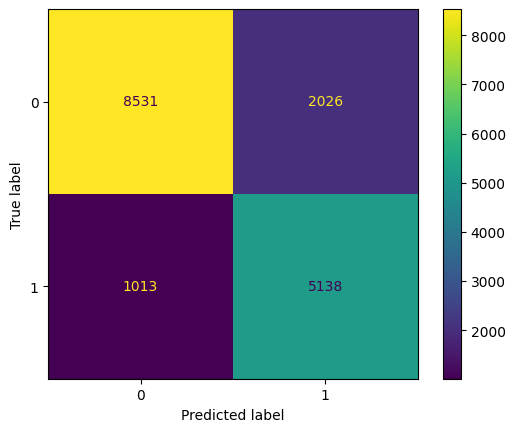

In [103]:
# printing the confusion matrix
confusion = confusion_matrix(y_test, y_Predict1)
disp = ConfusionMatrixDisplay(confusion)
disp.plot()

In [104]:
print (model4.score(X_test1,y_test))

0.8181110845104141


In [105]:
print(classification_report(y_test, y_Predict1))

              precision    recall  f1-score   support

           0       0.89      0.81      0.85     10557
           1       0.72      0.84      0.77      6151

    accuracy                           0.82     16708
   macro avg       0.81      0.82      0.81     16708
weighted avg       0.83      0.82      0.82     16708



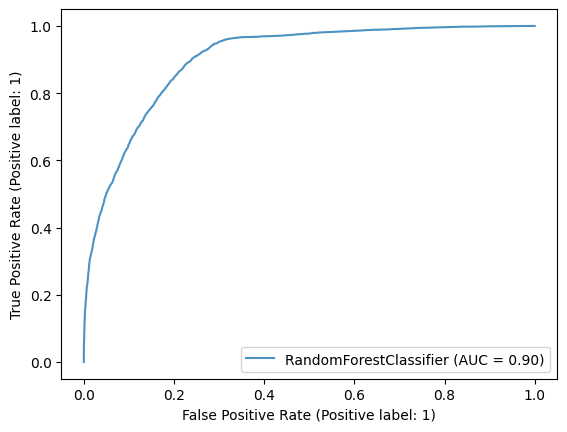

In [106]:
disp = RocCurveDisplay.from_estimator(model4, X_test1, y_test, alpha=0.8)

plt.show()

Building the model after scaling the values

In [107]:
print(X_train.select_dtypes(exclude = object).columns)
print(X_test.select_dtypes(exclude = object).columns)

Index(['age', 'height(cm)', 'weight(kg)', 'waist(cm)', 'eyesight(left)',
       'eyesight(right)', 'hearing(left)', 'hearing(right)', 'systolic',
       'relaxation', 'fasting blood sugar', 'Cholesterol', 'triglyceride',
       'HDL', 'LDL', 'hemoglobin', 'Urine protein', 'serum creatinine', 'AST',
       'ALT', 'Gtp', 'dental caries', 'gender_F', 'gender_M', 'oral_Y'],
      dtype='object')
Index(['age', 'height(cm)', 'weight(kg)', 'waist(cm)', 'eyesight(left)',
       'eyesight(right)', 'hearing(left)', 'hearing(right)', 'systolic',
       'relaxation', 'fasting blood sugar', 'Cholesterol', 'triglyceride',
       'HDL', 'LDL', 'hemoglobin', 'Urine protein', 'serum creatinine', 'AST',
       'ALT', 'Gtp', 'dental caries', 'gender_F', 'gender_M', 'oral_Y'],
      dtype='object')


In [108]:
mm_scaler = MinMaxScaler()
scaling_columns = ['age', 'height(cm)', 'weight(kg)', 'waist(cm)', 'eyesight(left)',
       'eyesight(right)', 'hearing(left)', 'hearing(right)', 'systolic',
       'relaxation', 'fasting blood sugar', 'Cholesterol', 'triglyceride',
       'HDL', 'LDL', 'hemoglobin', 'Urine protein', 'serum creatinine', 'AST',
       'ALT', 'Gtp', 'dental caries', 'gender_F', 'gender_M', 'oral_Y']
mm_scaler.fit(X_train[scaling_columns])
X_train[scaling_columns] = mm_scaler.transform(X_train[scaling_columns])
X_test[scaling_columns] = mm_scaler.transform(X_test[scaling_columns])

In [109]:
X_test


,age,height(cm),weight(kg),waist(cm),eyesight(left),eyesight(right),hearing(left),hearing(right),systolic,relaxation,...,hemoglobin,Urine protein,serum creatinine,AST,ALT,Gtp,dental caries,gender_F,gender_M,oral_Y
33967,0.384615,0.454545,0.25,0.260756,0.091837,0.040816,0.0,0.0,0.246914,0.150943,...,0.395062,0.0,0.060870,0.007669,0.003090,0.010020,0.0,1.0,0.0,0.0
21956,0.538462,0.181818,0.10,0.383312,0.071429,0.040816,0.0,0.0,0.203704,0.283019,...,0.561728,0.0,0.052174,0.013037,0.004463,0.018036,1.0,1.0,0.0,0.0
15458,0.076923,0.636364,0.50,0.560626,0.091837,0.112245,0.0,0.0,0.240741,0.283019,...,0.722222,0.0,0.060870,0.057515,0.049777,0.247495,1.0,0.0,1.0,0.0
36215,0.384615,0.636364,0.40,0.404172,0.040816,0.030612,0.0,0.0,0.327160,0.396226,...,0.617284,0.0,0.043478,0.015337,0.015105,0.069138,0.0,0.0,1.0,0.0
8886,0.307692,0.545455,0.30,0.338983,0.112245,0.112245,0.0,0.0,0.320988,0.311321,...,0.709877,0.0,0.078261,0.025307,0.023344,0.054108,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6146,0.230769,0.727273,0.65,0.581486,0.081633,0.081633,0.0,0.0,0.327160,0.396226,...,0.703704,0.0,0.078261,0.028374,0.027120,0.042084,1.0,0.0,1.0,0.0
49172,0.307692,0.545455,0.40,0.521512,0.112245,0.142857,0.0,0.0,0.216049,0.188679,...,0.660494,0.0,0.078261,0.036810,0.036389,0.072144,0.0,0.0,1.0,0.0
40065,0.153846,0.727273,0.45,0.417210,0.112245,0.030612,0.0,0.0,0.475309,0.490566,...,0.691358,0.0,0.078261,0.020706,0.018538,0.024048,1.0,0.0,1.0,0.0
3063,0.384615,0.272727,0.20,0.404172,0.071429,0.061224,0.0,0.0,0.203704,0.245283,...,0.487654,0.0,0.052174,0.008436,0.005493,0.020040,1.0,1.0,0.0,0.0


In [110]:
rf = RandomForestClassifier(random_state =42)

rf.fit(X_train,y_train)

pred_tr = rf.predict_proba(X_train)[:,1]
pred_va = rf.predict_proba(X_test)[:,1]
y_Predict2 = rf.predict(X_test)

print(roc_auc_score(y_train,pred_tr))
print(roc_auc_score(y_test,pred_va))

C:\Users\Renga\AppData\Local\Temp\ipykernel_42100\3633706643.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf.fit(X_train,y_train)


1.0
0.9029332248081948


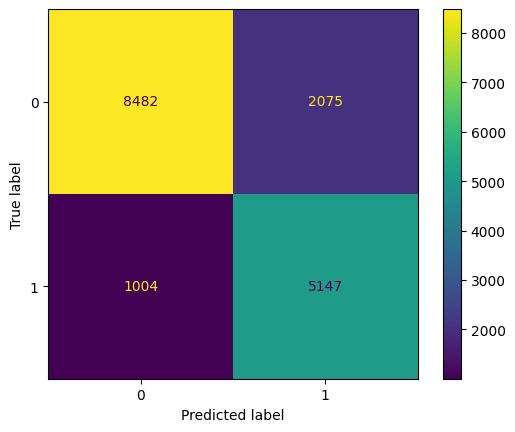

In [111]:
# printing the confusion matrix
confusion = confusion_matrix(y_test, y_Predict2)
disp = ConfusionMatrixDisplay(confusion)
disp.plot()

In [112]:
print(classification_report(y_test, y_Predict2))

              precision    recall  f1-score   support

           0       0.89      0.80      0.85     10557
           1       0.71      0.84      0.77      6151

    accuracy                           0.82     16708
   macro avg       0.80      0.82      0.81     16708
weighted avg       0.83      0.82      0.82     16708



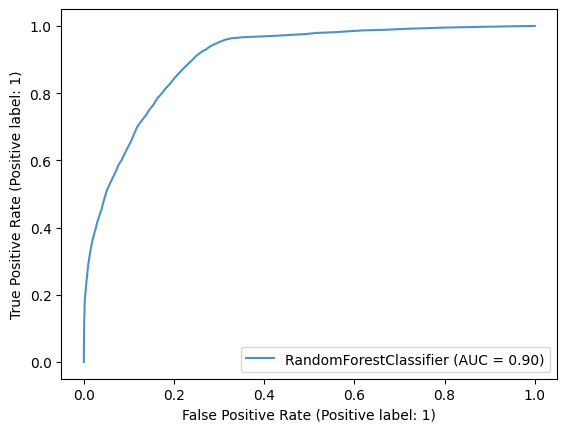

In [113]:
# Is ROC AUC better than accuracy?
# In some cases (for uniformly distributed data), Accuracy may be more important than ROC AUC. 
# But in other cases (for extremely Imbalanced data), ROC AUC may be more important. Generally, 
# AUC is preferred over Accuracy as it is a much better indicator of model performance
rfc_disp = RocCurveDisplay.from_estimator(rf, X_test, y_test, alpha=0.8)
# rfc_disp.plot(ax=ax, alpha=0.8)
plt.show()

Implementing XGboost

In [114]:
from xgboost import XGBClassifier

In [115]:
# fit model no training data
model = XGBClassifier()
model.fit(X_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, feature_types=None, gamma=0, gpu_id=-1,
              grow_policy='depthwise', importance_type=None,
              interaction_constraints='', learning_rate=0.300000012,
              max_bin=256, max_cat_threshold=64, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=0, ...)

In [116]:
print(model)

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, feature_types=None, gamma=0, gpu_id=-1,
              grow_policy='depthwise', importance_type=None,
              interaction_constraints='', learning_rate=0.300000012,
              max_bin=256, max_cat_threshold=64, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=0, ...)


In [117]:
# make predictions for test data
y_pred = model.predict(X_test)
predictions = [round(value) for value in y_pred]

In [118]:
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.83      0.81      0.82     10557
           1       0.69      0.72      0.70      6151

    accuracy                           0.78     16708
   macro avg       0.76      0.76      0.76     16708
weighted avg       0.78      0.78      0.78     16708



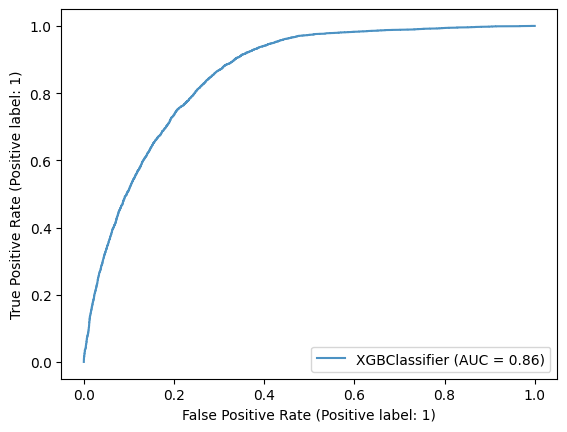

In [119]:
xgboost_disp = RocCurveDisplay.from_estimator(model, X_test, y_test, alpha=0.8)
# rfc_disp.plot(ax=ax, alpha=0.8)
plt.show()

In [120]:
accuracy = accuracy_score(y_test, predictions)
accuracy

0.7759755805602107

Grid search CV

In [121]:
# from sklearn.model_selection import GridSearchCV
# param_grid = {'n_estimators' : [50,100,150,200,250],
#               'max_depth' : [4,5,6,7,8]}
# clf = GridSearchCV(RandomForestClassifier(random_state = 42),param_grid, cv=3,verbose = 3)
# clf.fit(X_train, y_train['smoking'])

# print(clf.best_params_)
# print(clf.best_score_)
# print(clf.score(X_test, y_test['smoking']))

KNN 

In [122]:
from sklearn.neighbors import KNeighborsClassifier

In [123]:
k = 5  
neigh = KNeighborsClassifier(n_neighbors = k).fit(X_train,y_train)
Pred_y = neigh.predict(X_test)
print("Accuracy of model at K=5 is",accuracy_score(y_test, Pred_y))

c:\Users\Renga\anaconda3\envs\DataMining\lib\site-packages\sklearn\neighbors\_classification.py:207: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


Accuracy of model at K=5 is 0.7307277950682308


In [124]:
acc = []
# Will take some time
from sklearn import metrics
for i in range(1,40):
    neigh = KNeighborsClassifier(n_neighbors = i).fit(X_train,y_train)
    yhat = neigh.predict(X_test)
    acc.append(metrics.accuracy_score(y_test, yhat))

c:\Users\Renga\anaconda3\envs\DataMining\lib\site-packages\sklearn\neighbors\_classification.py:207: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
c:\Users\Renga\anaconda3\envs\DataMining\lib\site-packages\sklearn\neighbors\_classification.py:207: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
c:\Users\Renga\anaconda3\envs\DataMining\lib\site-packages\sklearn\neighbors\_classification.py:207: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
c:\Users\Renga\anaconda3\envs\DataMining\lib\site-packages\sklearn\neighbors\_classification.py:207: DataConversionWarning: A column-vector y was passed when

Maximum accuracy:- 0.7737610725401005 at K = 0


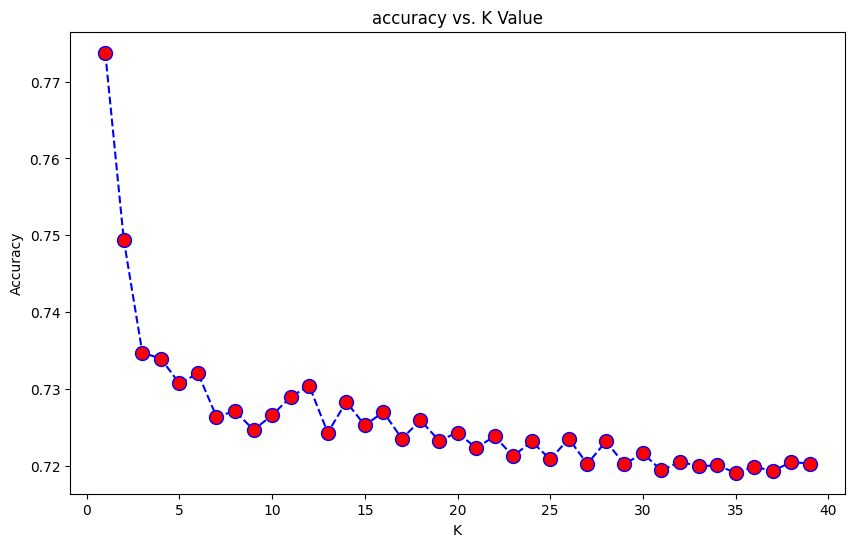

In [125]:
plt.figure(figsize=(10,6))
plt.plot(range(1,40),acc,color = 'blue',linestyle='dashed', 
         marker='o',markerfacecolor='red', markersize=10)
plt.title('accuracy vs. K Value')
plt.xlabel('K')
plt.ylabel('Accuracy')
print("Maximum accuracy:-",max(acc),"at K =",acc.index(max(acc)))

In [126]:
neigh = KNeighborsClassifier(n_neighbors = 2).fit(X_train,y_train)
yhat1 = neigh.predict(X_test)

c:\Users\Renga\anaconda3\envs\DataMining\lib\site-packages\sklearn\neighbors\_classification.py:207: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


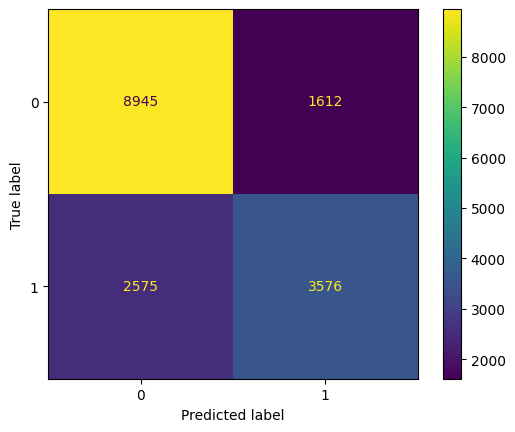

In [127]:
# printing the confusion matrix
confusion = confusion_matrix(y_test, yhat1)
disp = ConfusionMatrixDisplay(confusion)
disp.plot()

In [128]:
print(classification_report(y_test, yhat1))

              precision    recall  f1-score   support

           0       0.78      0.85      0.81     10557
           1       0.69      0.58      0.63      6151

    accuracy                           0.75     16708
   macro avg       0.73      0.71      0.72     16708
weighted avg       0.74      0.75      0.74     16708



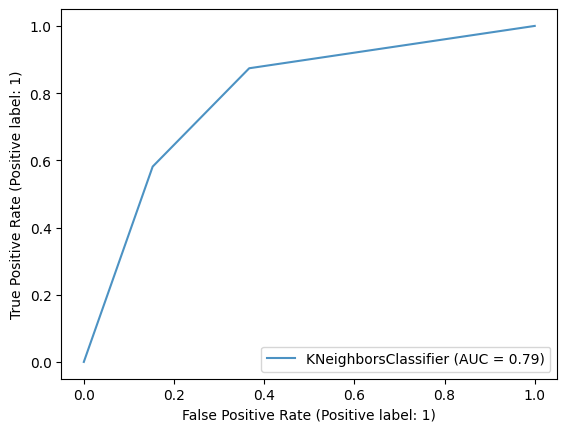

In [129]:
disp = RocCurveDisplay.from_estimator(neigh, X_test, y_test, alpha=0.8)

plt.show()

SVM classifier

In [130]:
from sklearn import svm

In [131]:
clf = svm.SVC(kernel='linear')
model5 = clf.fit(X_train,y_train)
y_pred = model5.predict(X_test)

c:\Users\Renga\anaconda3\envs\DataMining\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [132]:
# Model Accuracy: how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

# Model Precision: what percentage of positive tuples are labeled as such?
print("Precision:",metrics.precision_score(y_test, y_pred))

# Model Recall: what percentage of positive tuples are labelled as such?
print("Recall:",metrics.recall_score(y_test, y_pred))

print("F1_score:",metrics.f1_score(y_test, y_pred))

Accuracy: 0.7017596361024658
Precision: 0.5551359516616314
Recall: 0.9559421232319948
F1_score: 0.702383085468554


In [133]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.96      0.55      0.70     10557
           1       0.56      0.96      0.70      6151

    accuracy                           0.70     16708
   macro avg       0.76      0.75      0.70     16708
weighted avg       0.81      0.70      0.70     16708



In [134]:
clf6 = svm.SVC(kernel='sigmoid')
model6 = clf6.fit(X_train,y_train)
y_pred1 = model6.predict(X_test)

c:\Users\Renga\anaconda3\envs\DataMining\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [135]:
# Model Accuracy: how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred1))

# Model Precision: what percentage of positive tuples are labeled as such?
print("Precision:",metrics.precision_score(y_test, y_pred1))

# Model Recall: what percentage of positive tuples are labelled as such?
print("Recall:",metrics.recall_score(y_test, y_pred1))

print("F1_score:",metrics.f1_score(y_test, y_pred1))

Accuracy: 0.5995331577687335
Precision: 0.46139548184157847
Recall: 0.5246301414404162
F1_score: 0.49098516546215293
